Taks 1 - Import required libraries 

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

Task 2 – Generate random data for the social media data 

In [67]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
data = {
    'Date': pd.date_range('2021-01-01', periods=500),
    'Category': [random.choice(categories) for _ in range(500)],
    'Number of likes': np.random.randint(0, 10_000, size=500)
}

Task 3 – Load the data into a Pandas DataFrame and Explore the data 

In [68]:
df = pd.DataFrame(data)
df.head()

,Date,Category,Number of likes
0,2021-01-01,Culture,7023
1,2021-01-02,Food,122
2,2021-01-03,Fashion,4485
3,2021-01-04,Family,4595
4,2021-01-05,Music,9086


In [69]:
# Returns info for every column (name, non-null count, Dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             500 non-null    datetime64[ns]
 1   Category         500 non-null    object        
 2   Number of likes  500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [70]:
# Returns basic statistical measures for numeric data
df.describe()

,Number of likes
count,500.000000
mean,5096.076000
std,2933.287215
min,50.000000
25%,2452.250000
50%,5197.500000
75%,7566.500000
max,9965.000000


In [71]:
# Counts each category occurances
df['Category'].value_counts()


Music      80
Fitness    77
Health     65
Travel     64
Fashion    61
Family     59
Culture    49
Food       45
Name: Category, dtype: int64

Task 4 – Clean the data 

In [72]:
# Removes empty cells
df.dropna(inplace=True)

In [73]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [74]:
# Convert 'Number of likes' to integer
df['Number of likes'] = pd.to_numeric(df['Number of likes'])

Task 5 – Visualize and Analyze the data 

<Axes: xlabel='Number of likes', ylabel='Count'>

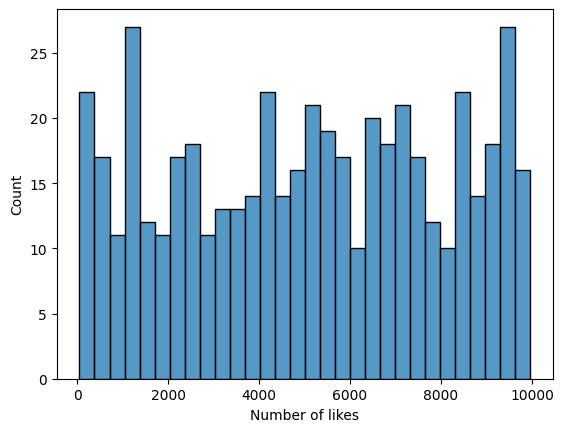

In [76]:
# Returns histplot
sns.histplot(data=df['Number of likes'], bins=30)

<Axes: xlabel='Category', ylabel='Number of likes'>

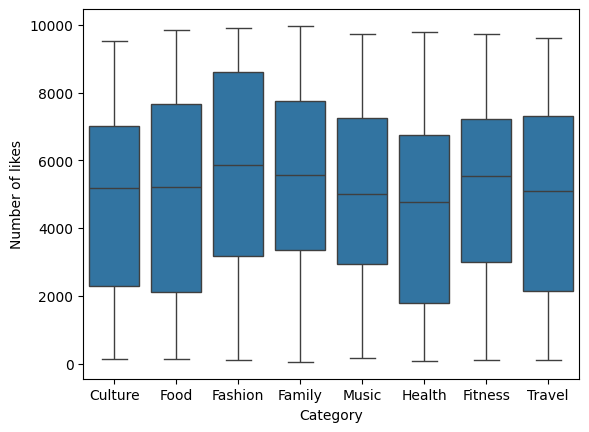

In [77]:
# Returns boxplot
sns.boxplot(data=df, x='Category', y = 'Number of likes')

In [78]:
# Returns mean of 'Number of likes' column
df['Number of likes'].mean()

5096.076

In [83]:
# Groups data by 'Category' key and mean of 'Number of likes'
df.groupby('Category')['Number of likes'].mean()

Category
Culture    4760.326531
Family     5383.440678
Fashion    5624.426230
Fitness    5160.987013
Food       5115.088889
Health     4612.184615
Music      5163.887500
Travel     4899.859375
Name: Number of likes, dtype: float64

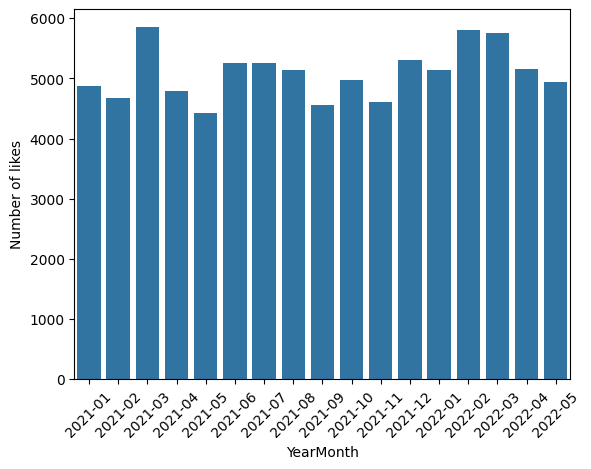

In [90]:
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_likes = df.groupby('YearMonth')['Number of likes'].mean().reset_index()
sns.barplot(data=monthly_likes, x='YearMonth', y='Number of likes')

plt.xticks(rotation=45)
plt.show()

Task 6 – Describe Conclusions  

1. Conclusions:
 - the most liked category of posts is Fashion, this should be direction to reach more page followers
 - the least liked category of posts is Culture, for yout followers this kind of posts are the less interesting, probably there should be maked some improvements to reach more likes
 - the month you achieve most likes is march, the less likes you achieve in may, september and november